# Project Code

In [1]:
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

memory_df = pd.read_csv('hippoCorpusV2.csv')
concreteness = pd.read_excel('concreteness.xlsx')

In [2]:
mask1 = memory_df['memType'] == 'recalled'
mask2 = memory_df['memType'] == 'imagined'
retold_imagined = memory_df[mask1 | mask2].copy()
retold_imagined["target"] = retold_imagined["memType"].apply(lambda x: 1 if x  == 'imagined' else 0)
retold_imagined.iloc[3000]['story']



tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

def clean_up_sentence(string):
    # tokenization & removing any characater that is not of the alphabet
    X_list = word_tokenize(string.lower()) 
    X_list = [word for word in X_list if word.isalpha()]

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    
    # remove stop words from the string 
    X_list = [w for w in X_list if not w in sw]  
   
    # lemmetize each word in the string.
    lem = WordNetLemmatizer()
    
    X_list = [lem.lemmatize(w) for w in X_list]
    X_list = [lem.lemmatize(w, pos="a") for w in X_list]
    X_list = [lem.lemmatize(w, pos="v") for w in X_list]
    return X_list

retold_imagined['story_token'] = retold_imagined['story'].apply(clean_up_sentence)
retold_imagined['summary_token'] = retold_imagined['summary'].apply(clean_up_sentence)
retold_imagined['mainEvent_token'] = retold_imagined['mainEvent'].apply(clean_up_sentence)
retold_imagined

AssignmentId  WorkTimeInSeconds  WorkerId  \
0     32RIADZISTQWI5XIVG5BN0VMYFRS4U               1641  XI8VK89S   
1     3018Q3ZVOJCZJFDMPSFXATCQ4DARA2               1245  1HN5ZZ1D   
2     3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61               1159  8SBPL7EI   
3     3018Q3ZVOJCZJFDMPSFXATCQG04RAI                500  M1QQED2V   
4     3MTMREQS4W44RBU8OMP3XSK8NMJAWZ               1074  DU3RPZDB   
...                              ...                ...       ...   
6849  3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1                926  KVSO6L8P   
6850  39PAAFCODNMWRITC4CBO6VRL6O4TV3               3044  QJB7AXPP   
6851  3FE2ERCCZYU396R8MJGQ6TWGLSMOPR               1008  IJP8D12L   
6852  3J88R45B2HKQ3F50NA3MP6N9XXKPXS               1462  LCKEHYRF   
6853  3YW4XOSQKR7V5JS3X3H943670Y51UE               1662  YMC00EM1   

      annotatorAge annotatorGender annotatorRace  distracted  draining  \
0             25.0             man         white         1.0       1.0   
1             25.0           woman         white         1.0       1.0   
2             35.0           woman         black         1.0       1.0   
3             30.0           woman         white         1.0       4.0   
4             25.0             man         white         2.0       2.0   
...            ...             ...           ...         ...       ...   
6849          30.0           woman         other         3.0       5.0   
6850          18.0           woman         asian         4.0       2.0   
6851          35.0             man         asian         1.0       2.0   
6852          30.0             man          hisp         1.0       1.0   
6853          45.0           woman         white         1.0       5.0   

      frequency  importance  ...  similarity  \
0           NaN         3.0  ...         3.0   
1           3.0         4.0  ...         NaN   
2           NaN         4.0  ...         3.0   
3           3.0         5.0  ...         NaN   
4           NaN         3.0  ...         4.0   
...         ...         ...  ...         ...   
6849        3.0         5.0  ...         NaN   
6850        4.0         2.0  ...         NaN   
6851        2.0         4.0  ...         NaN   
6852        3.0         3.0  ...         NaN   
6853        4.0         5.0  ...         NaN   

                                   similarityReason  \
0     I've been to a couple concerts, but not many.   
1                                               NaN   
2                              I am a mother myself   
3                                               NaN   
4                Because I also have money problems   
...                                             ...   
6849                                            NaN   
6850                                            NaN   
6851                                            NaN   
6852                                            NaN   
6853                                            NaN   

                                                  story stressful  \
0     Concerts are my most favorite thing, and my bo...       1.0   
1     The day started perfectly, with a great drive ...       1.0   
2     It seems just like yesterday but today makes f...       1.0   
3     Five months ago, my niece and nephew were born...       2.0   
4     About a month ago I went to burning man. I was...       4.0   
...                                                 ...       ...   
6849  My dog was diagnosed with lymphoma a year ago ...       5.0   
6850  Over my vacation from my job, I went to Casper...       5.0   
6851  This event was a birthday party for my nephew....       2.0   
6852  This event occurred about two weeks ago. I was...       2.0   
6853  Over the past year I have been involved with a...       4.0   

                                                summary timeSinceEvent target  \
0     My boyfriend and I went to a concert together ...           90.0      1   
1     My boyfriend and I went to a concert together ...           90.0      0

In [3]:
sid = SentimentIntensityAnalyzer()

def sentiment_anal(summary, story):
    avg_score = 0
    num = 0
    def once(review, ori1, ori2):
    #     print(ori1, ori2)
        startpos = ori1-2 if ori1-2 > 0 else 0
        endpos = ori2+2 if ori2+2 < len(review)-1 else len(review)-1
        sentence = review[startpos: endpos+1]
        sentence_s = " ".join(sentence)
    #     print(sentence_s)
        return sid.polarity_scores(sentence_s)["compound"]

    for number in range(len(summary)):
        if summary[number] in story:
            num += 1
            count = [i for i, n in enumerate(story) if n == summary[number]]
            avg_score += once(story, count[0], count[-1])
    if num != 0:
        return avg_score/num
    else:
        return 0

sentiment_summary = []
for x in range(len(retold_imagined)):
    sentiment_summary.append(sentiment_anal(retold_imagined.iloc[x]["summary_token"],
                                               retold_imagined.iloc[x]["story_token"]))

retold_imagined['sentiment_summary'] = sentiment_summary

sentiment_mainEvent = []
for x in range(len(retold_imagined)):
    sentiment_mainEvent.append(sentiment_anal(retold_imagined.iloc[x]["mainEvent_token"],
                                               retold_imagined.iloc[x]["story_token"]))
retold_imagined['sentiment_mainEvent'] = sentiment_mainEvent
retold_imagined['total_word_count'] = retold_imagined['story'].apply(lambda x: len(x))
retold_imagined['remove_stop_word_count'] = retold_imagined['story_token'].apply(lambda x: len(x))    
concrete_dict = concreteness[['Word', 'Conc.M']].set_index('Word').to_dict()['Conc.M']
def concrete(wlist):
    score = 0
    count = 0
    for word in wlist:
        if word in concrete_dict:
            score += concrete_dict.get(word)
            count += 1
    if count > 0:
        return score/count
    else:
        return 0

con = []
for x in range(len(retold_imagined)):
    con.append(concrete(retold_imagined.iloc[x]['story_token']))
retold_imagined["concreteness"] = con

def similarity(tmp, list_of_words):
    attribute = ", ".join(tmp)
    string = ", ".join(list_of_words)
    documents = [attribute, string]
    count_vectorizer = CountVectorizer()
    count_matrix = count_vectorizer.fit_transform(documents)
    return cosine_similarity(count_matrix[0:1], count_matrix)[0][1]

summary_sim = []
for x in range(len(retold_imagined)):
    summary_sim.append(similarity(retold_imagined.iloc[x]['summary_token'],
                                            retold_imagined.iloc[x]['story_token']))
retold_imagined["summary_sim"] = summary_sim
mainEvent_sim = []
for x in range(len(retold_imagined)):
    mainEvent_sim.append(similarity(retold_imagined.iloc[x]['mainEvent_token'],
                                            retold_imagined.iloc[x]['story_token']))
retold_imagined["mainEvent_sim"] = summary_sim

analysis_df = retold_imagined[["target", "sentiment_summary", "sentiment_mainEvent", "total_word_count", "remove_stop_word_count",
                    "summary_sim", "mainEvent_sim", "concreteness"]].copy()



y = analysis_df['target'].values
X = analysis_df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)


The accuracy score for Random Forest Clssifier is 0.630057803468208
The accuracy score for Gradient Boosting Clssifier is 0.6416184971098265
The accuracy score for Gradient Boosting Clssifier is 0.6416184971098265
[0.16030508 0.15745768 0.19439782 0.10738423 0.09759696 0.13940914
 0.14344909]
Index(['sentiment_summary', 'sentiment_mainEvent', 'total_word_count',
       'remove_stop_word_count', 'summary_sim', 'mainEvent_sim',
       'concreteness'],
      dtype='object')


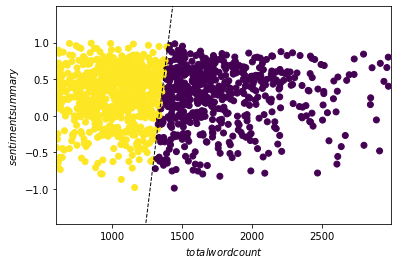

0.639364008672609


'dtree_render.png'

In [8]:
from sklearn.tree import DecisionTreeClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)
print("The accuracy score for Random Forest Clssifier is", rfc.score(X_test, y_test))

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("The accuracy score for Gradient Boosting Clssifier is", gbc.score(X_test, y_test))

abc = AdaBoostClassifier().fit(X_train, y_train)
print("The accuracy score for Gradient Boosting Clssifier is", abc.score(X_test, y_test))

clf = DecisionTreeClassifier(random_state=10).fit(X_train, y_train)
print(clf.feature_importances_)
print(X.columns)

X_train_sub = X_train[["total_word_count", "sentiment_summary"]]
X_test_sub = X_test[["total_word_count", "sentiment_summary"]]

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, C=10).fit(X_train_sub, y_train)
y_test = clf.predict(X_test_sub)

xmin, xmax = X_train_sub.iloc[:, 0].min() - .5, X_train_sub.iloc[:, 0].max() + .5
ymin, ymax = X_train_sub.iloc[:, 1].min() - .5, X_train_sub.iloc[:, 1].max() + .5

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

plt.scatter(X_test_sub.iloc[:, 0], X_test_sub.iloc[:, 1], c=y_test.reshape(-1))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$sentiment summary$')
plt.xlabel(r'$total word count$')
plt.show()


from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model.fit(X_train, y_train)
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))
import graphviz

graph = graphviz.Source(tree.export_graphviz(model,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True))
graph.format = 'png'
graph.render('dtree_render',view=True)

The MSE for the training set is 0.006848999368311488
The MSE for the test set is 0.010885927892189702
                            OLS Regression Results                            
Dep. Variable:        similarityscore   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.289
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           4.03e-10
Time:                        19:45:20   Log-Likelihood:                 1299.2
No. Observations:                1304   AIC:                            -2554.
Df Residuals:                    1282   BIC:                            -2441.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------

                            OLS Regression Results                            
Dep. Variable:        similarityscore   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.581
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           3.95e-05
Time:                        19:45:21   Log-Likelihood:                 3984.9
No. Observations:                2604   AIC:                            -7920.
Df Residuals:                    2579   BIC:                            -7773.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

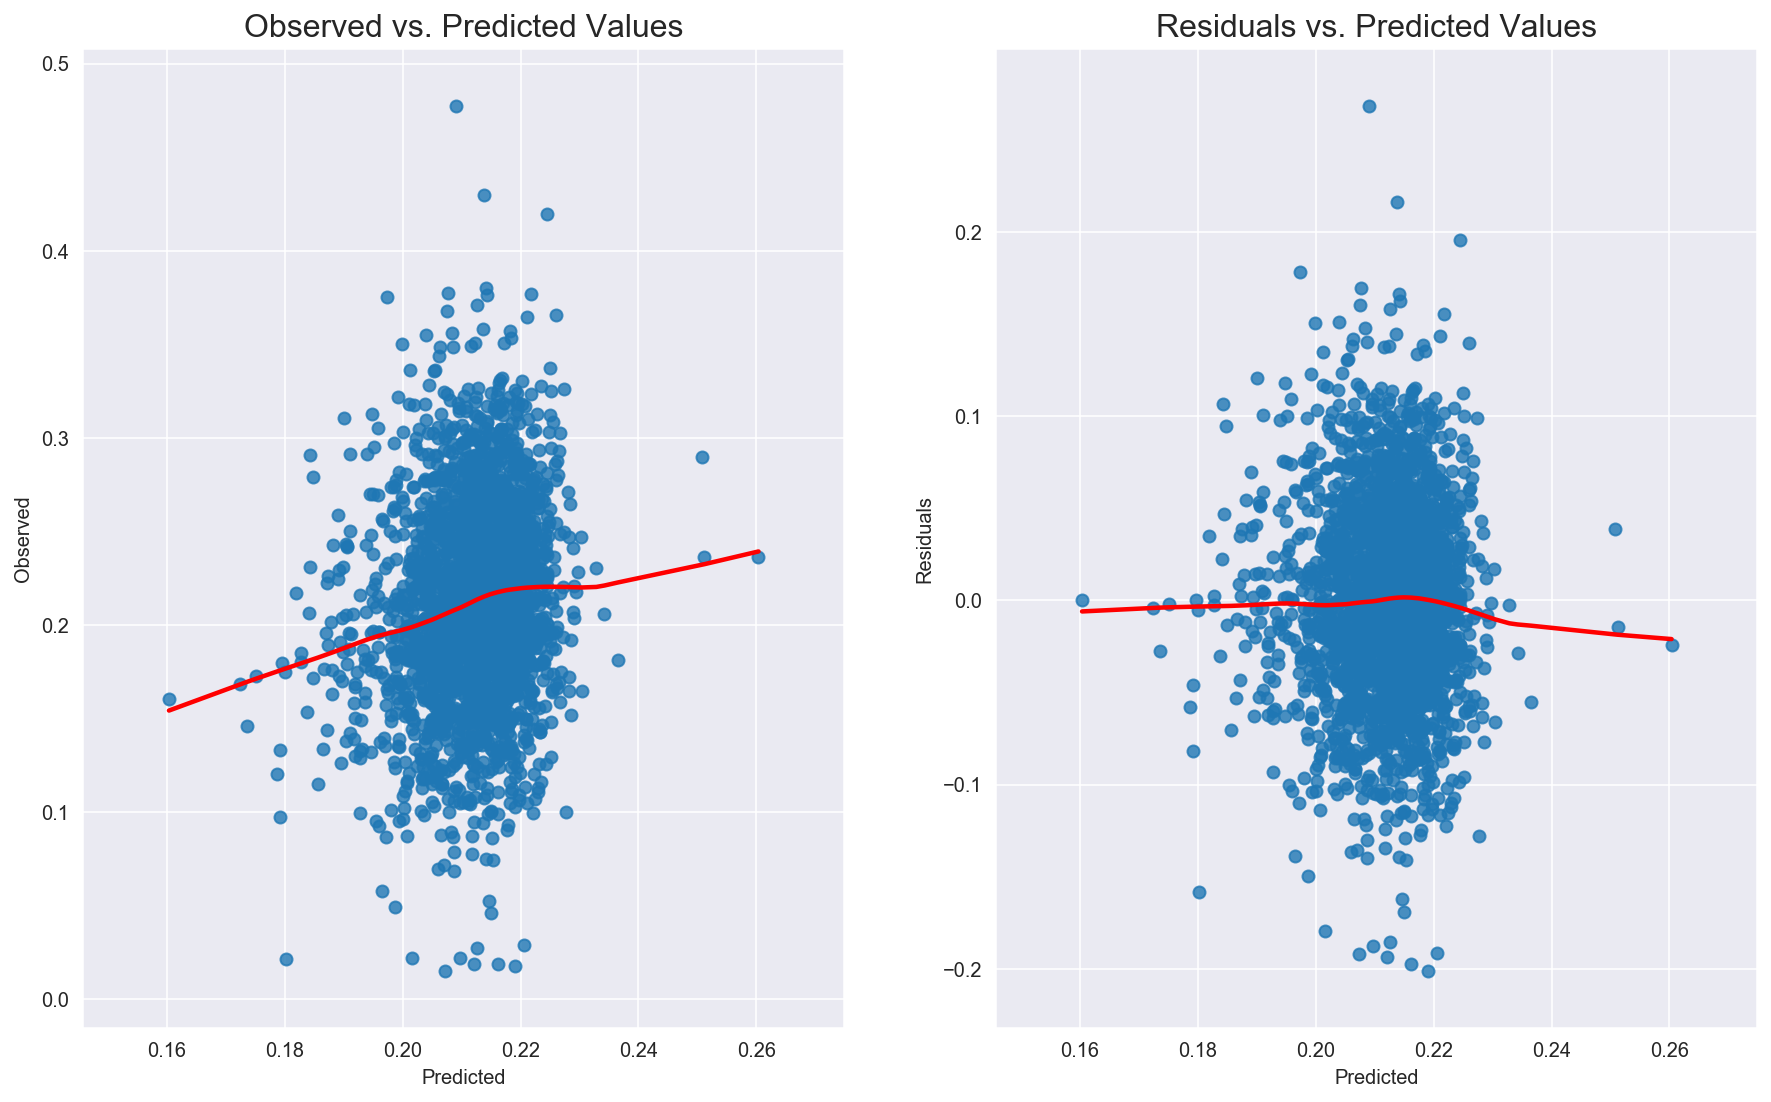

In [12]:
pd.set_option('display.max_rows', 500)

memory_df = pd.read_csv('hippoCorpusV2.csv')


memory_df


mask1 = memory_df['AssignmentId'] == memory_df['recAgnPairId']


retold_recall = memory_df[~mask1].copy()


retold_table = memory_df.merge(retold_recall, left_on='AssignmentId', right_on='recAgnPairId', suffixes=['_1st','_2nd'])


# ### Prepping the data to merge for Imagined stories 


mask = memory_df['AssignmentId'] == memory_df['recImgPairId']



imagined_recall = memory_df[~mask].copy()


# ### Creating new table that merges on the ID values


imagined_table = memory_df.merge(imagined_recall, left_on='AssignmentId', right_on='recImgPairId', suffixes=['_1st','_2nd'])


imagined_table["similarity_2nd"].value_counts()


# **Data Analysis*


#checking the distribution of age cross-sectioned by gender to check the gender distribution of a certain age range.
memory_df.groupby(['annotatorAge','annotatorGender']).count()


ax = memory_df.groupby(['annotatorAge','annotatorGender']).count()['AssignmentId'].unstack().plot(by='annotatorRace', kind ='bar', title='Count of Gender for each Age Group')
ax.set_xlabel("Annotator's Age")
ax.set_ylabel("Count of Annotators")
memory_df.groupby('annotatorAge')['annotatorRace'].count()


ax1 = memory_df.groupby(['annotatorAge','annotatorRace']).count()['AssignmentId'].unstack().plot(by='annotatorRace', kind ='bar', title = 'Count of Race for each Age Group')
ax1.set_xlabel("Annotator's Age")
ax1.set_ylabel("Count of Annotators")
ax1.legend(bbox_to_anchor=(1.1, 1.05))

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')


similarityscore = []

for x in range(len(imagined_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =imagined_table.iloc[x]['story_1st']
    Y =imagined_table.iloc[x]['story_2nd']

    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    similarityscore.append(cosine)


imagined_table["similarityscore"] = similarityscore


# **similarity score for retold table**
similarityscore = []

for x in range(len(retold_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =retold_table.iloc[x]['story_1st']
    Y =retold_table.iloc[x]['story_2nd']

    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    similarityscore.append(cosine)

retold_table["similarityscore"] = similarityscore


# # **RETOLD STORIES (doesn't have similarity)**
retold_linear = retold_table[["WorkTimeInSeconds_2nd", "annotatorAge_2nd","annotatorGender_2nd","annotatorRace_2nd", "distracted_2nd",
              "draining_2nd","frequency_2nd","importance_2nd","logTimeSinceEvent_2nd","openness_2nd",
              "stressful_2nd","timeSinceEvent_2nd","similarityscore"]].copy()
retold_linear.dropna(how="any", inplace=True)
retold_linear_regr = pd.get_dummies(retold_linear)

y = retold_linear_regr['similarityscore'].values
X = retold_linear_regr.drop(['similarityscore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
regr = LinearRegression().fit(X_train, y_train)
print(f'The MSE for the training set is {mean_squared_error(y_train, regr.predict(X_train))}')
print(f'The MSE for the test set is {mean_squared_error(y_test, regr.predict(X_test))}')

X_train.columns


# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices("similarityscore ~ WorkTimeInSeconds_2nd + annotatorAge_2nd + distracted_2nd + draining_2nd + importance_2nd + logTimeSinceEvent_2nd + openness_2nd + stressful_2nd + annotatorGender_2nd_man + annotatorGender_2nd_na + annotatorGender_2nd_nonBinary + annotatorGender_2nd_transman + annotatorGender_2nd_woman + annotatorRace_2nd_asian + annotatorRace_2nd_black + annotatorRace_2nd_hisp + annotatorRace_2nd_indian + annotatorRace_2nd_islander + annotatorRace_2nd_middleEastern + annotatorRace_2nd_na + annotatorRace_2nd_native + annotatorRace_2nd_white", data=retold_linear_regr, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices("similarityscore ~ WorkTimeInSeconds_2nd + annotatorAge_2nd + distracted_2nd + draining_2nd + importance_2nd + logTimeSinceEvent_2nd + openness_2nd + stressful_2nd + annotatorGender_2nd_man + annotatorGender_2nd_woman + annotatorRace_2nd_asian + annotatorRace_2nd_black + annotatorRace_2nd_hisp + annotatorRace_2nd_indian + annotatorRace_2nd_islander + annotatorRace_2nd_middleEastern + annotatorRace_2nd_na + annotatorRace_2nd_native + annotatorRace_2nd_white", data=retold_linear_regr, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())


# **Lasso Regression**


lasso = Lasso().fit(X_train, y_train)
print(lasso.coef_)
X_train.columns

print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))


# **Ridge Regression** 


ridge = Ridge().fit(X_train, y_train)
print(ridge.coef_)
X_train.columns



print(mean_squared_error(y_train, ridge.predict(X_train)))
print(mean_squared_error(y_test, ridge.predict(X_test)))


# **Decision Tree Classifier**


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import plot_roc_curve
import graphviz
from sklearn.tree import export_graphviz


dt = DecisionTreeRegressor().fit(X_train, y_train)
print(f'{dt.feature_importances_}\n') 
print(X_train.columns.values)

print('\n')
print(f'The MSE is {mean_squared_error(y_train, dt.predict(X_train))}')
print(f'The MSE is {mean_squared_error(y_test, dt.predict(X_test))}')



imagined_linear = imagined_table[["WorkTimeInSeconds_2nd", "annotatorAge_2nd","annotatorGender_2nd","annotatorRace_2nd", "distracted_2nd",
              "draining_2nd","importance_2nd","logTimeSinceEvent_2nd","openness_2nd", "similarity_2nd",
              "stressful_2nd","timeSinceEvent_2nd","similarityscore"]].copy()
imagined_linear.dropna(how="any", inplace=True)
imagined_linear_regr = pd.get_dummies(imagined_linear)

y = imagined_linear_regr['similarityscore'].values
X = imagined_linear_regr.drop(['similarityscore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
regr = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y_train, regr.predict(X_train)))
print(mean_squared_error(y_test, regr.predict(X_test)))

# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices("similarityscore ~ WorkTimeInSeconds_2nd + annotatorAge_2nd + distracted_2nd + draining_2nd + importance_2nd + logTimeSinceEvent_2nd + openness_2nd + similarity_2nd + stressful_2nd + annotatorGender_2nd_man + annotatorGender_2nd_na + annotatorGender_2nd_nonBinary + annotatorGender_2nd_other + annotatorGender_2nd_transman + annotatorGender_2nd_transwoman + annotatorGender_2nd_woman + annotatorRace_2nd_asian + annotatorRace_2nd_black + annotatorRace_2nd_hisp + annotatorRace_2nd_indian + annotatorRace_2nd_islander + annotatorRace_2nd_middleEastern + annotatorRace_2nd_na + annotatorRace_2nd_native + annotatorRace_2nd_other + annotatorRace_2nd_white", data=imagined_linear_regr, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())



len(imagined_linear_regr.columns)


# **Lasso Regression**


xtrain1 = X_train.drop('WorkTimeInSeconds_2nd', axis=1)
xtest1 = X_test.drop('WorkTimeInSeconds_2nd', axis=1)



lasso = Lasso().fit(X_train, y_train)
print(lasso.coef_)
print(f'\n{X_train.columns}')
print('\n')
print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))


# **Ridge Regression**


ridge = Ridge().fit(X_train, y_train)
print(ridge.coef_)
X_train.columns

print(mean_squared_error(y_train, ridge.predict(X_train)))
print(mean_squared_error(y_test, ridge.predict(X_test)))


# **Decision Tree Classifier**


dt = DecisionTreeRegressor().fit(X_train, y_train)
print(f'{dt.feature_importances_}\n') 
print(X_train.columns.values)

print('\n')
print(f'The MSE is {mean_squared_error(y_train, dt.predict(X_train))}')
print(f'The MSE is {mean_squared_error(y_test, dt.predict(X_test))}')

# **Checking linearity Assumptions**


log_y = np.log(y['similarityscore'])



import math as m

get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format ='retina'")
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(result, y)    
